1. List down all possible dimensionality reduction techniques that can be implemented using python.

<li>Missing Value Ratio
    
<li>Low Variance Filter
    
<li>High Correlation filter
    
<li>Random Forest
    
<li>Backward Feature Elimination
    
<li>Forward Feature Selection
    
<li>Factor Analysis
    
<li>Principal Component Analysis (PCA)
    
<li>Independent Component Analysis
    
<li>t- Distributed Stochastic Neighbor Embedding (t-SNE)
    
<li>UMAP

So far you have used dimensional reduction on numeric data. Is it possible to do the same on a multimedia data [images and video] and
text data ? Please illustrate your findings using a simple implementation on python.

In [48]:
# below is a sample dimensionality reduction implementaion on images using KMeans clustering

# importing relevant libraries
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

In [49]:
# converting image into np array

image_as_array = mpimg.imread('image.jpeg')

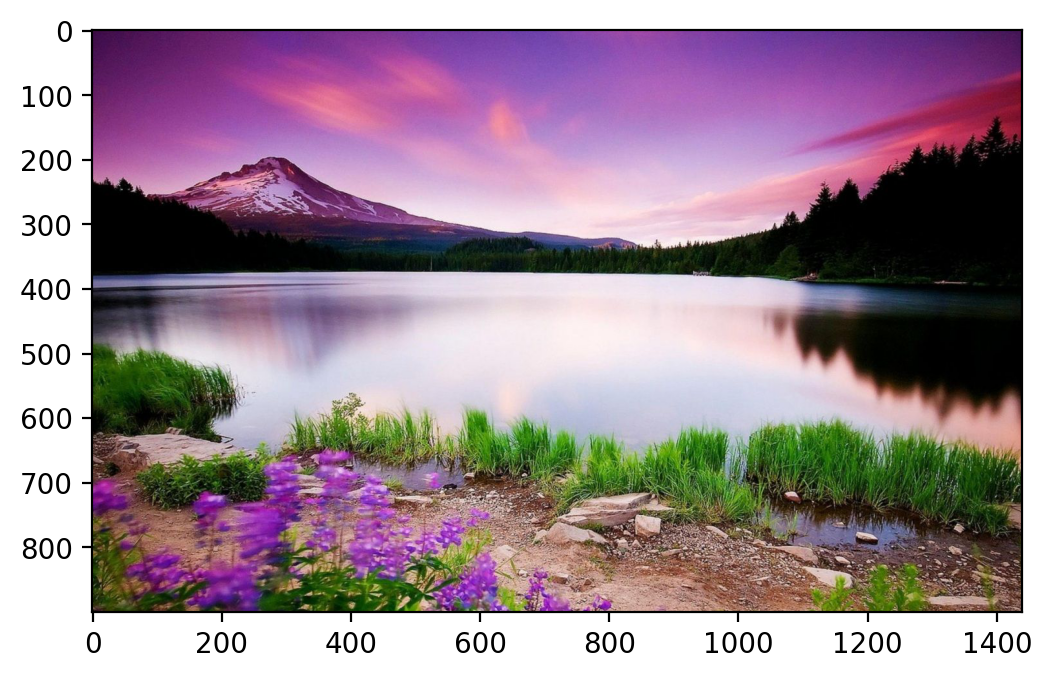

In [50]:
# displaying the imported image using the 3D array and using Imshow function

plt.figure(figsize=(6,6),dpi=200)
plt.imshow(image_as_array);

In [51]:
# exploring the shapre of the Image 3D array, the array is (height, width, 3 color channels)

image_as_array.shape


(900, 1440, 3)

In [52]:
# we will unpack the tuple so that we can access height and width which will allow us to reshape the image array

(h,w,c) = image_as_array.shape

In [53]:
# rehaping the 3d array to 2d so that it can be used in Kmeans, multiplying height and width to flatten the image
image_as_array2d = image_as_array.reshape(h*w,c)
image_as_array2d

array([[ 65,  17,  67],
       [ 65,  17,  67],
       [ 64,  16,  66],
       ...,
       [151, 117, 108],
       [140, 106,  97],
       [122,  88,  79]], dtype=uint8)

In [54]:
from sklearn.cluster import KMeans

In [55]:
# creating a kMeams instance with 5 clusters, that will allow us to compress the image and we are reducing the dimensions of the image

model = KMeans(n_clusters=5)

In [56]:
labels = model.fit_predict(image_as_array2d)

In [57]:
# from the model we can derive the cluster centers for all the 5 clusters and these essentially are the average of the RGB code codes (clusters)

model.cluster_centers_

array([[134.76694335,  69.82550523, 137.1825312 ],
       [225.51763007, 207.27505361, 221.7504644 ],
       [183.5439322 , 134.56349834, 168.26342073],
       [ 85.18829935,  83.03878392,  51.65915609],
       [ 14.29463945,  19.92505534,   8.93483432]])

In [58]:
# as the rgb color codes are integrers, we can round the cluster centers so that we can get the color code

rgb_codes = model.cluster_centers_.round(0).astype(int)
rgb_codes

# a 2d array of RGB colors

array([[135,  70, 137],
       [226, 207, 222],
       [184, 135, 168],
       [ 85,  83,  52],
       [ 14,  20,   9]])

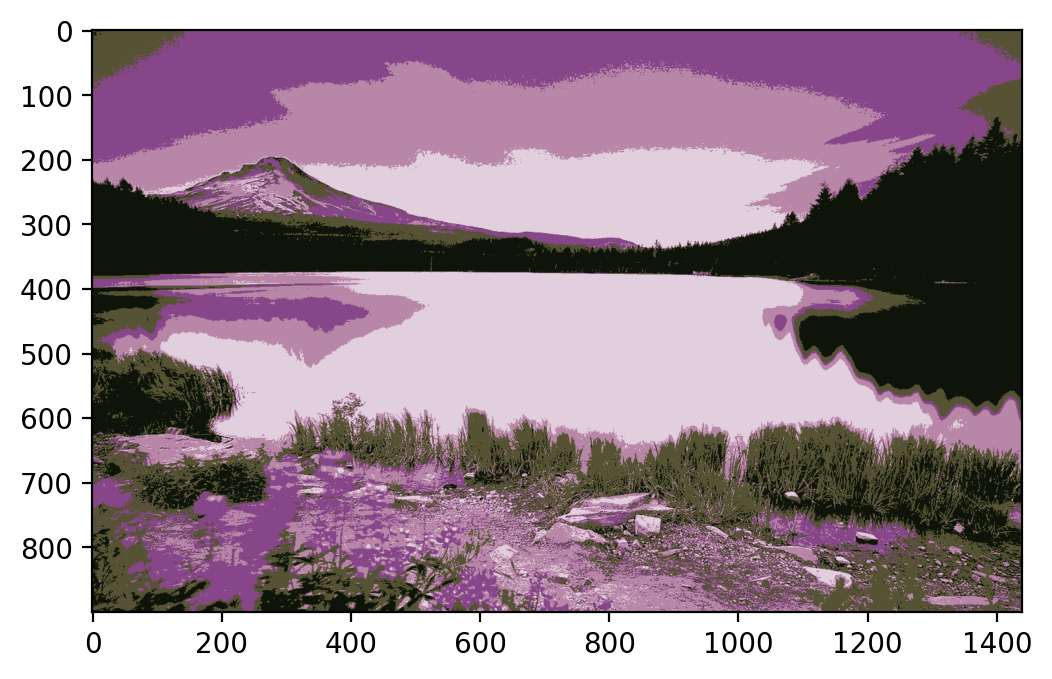

In [59]:
# we can now reshape the 2d array into 3d with the new RGB (cluster centers) codes and use the imshow function to view the cOmpressed image

compressed_image = np.reshape(rgb_codes[labels], (h, w, c))
plt.figure(figsize=(6,6),dpi=200)
plt.imshow(compressed_image);

In [60]:
# we can see from the above image that we have successfully reduced the dimensions of the image to derive a compressed image.